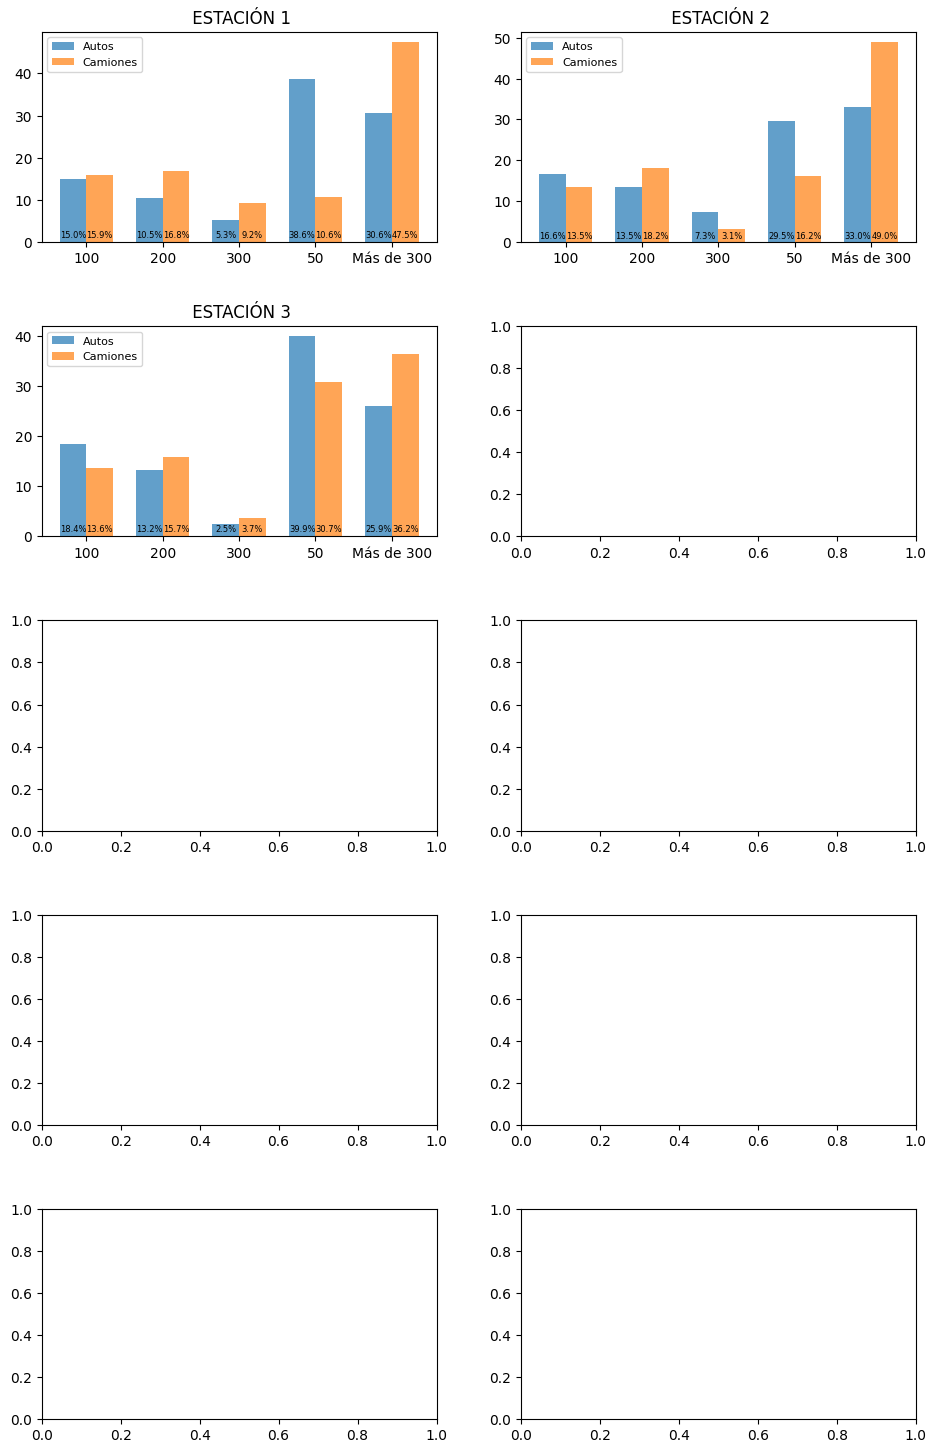

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Leer el archivo Excel
data = pd.read_excel("C:/Users/Brandon.Lopez/Documents/Trabajo/2307 - Tijuana - Ensenada/Encuestas OD-PD/EncODPD-Aut Tijuana-Ensenada Ejemplo gráficas.xlsx", sheet_name="BD_Exp (2)")
col_name = 'Rango_Viajes_Anuales'

# Calcular el total de 'TDPA' por 'EST' y 'Vehiculo'
total_TDPA_por_EST = data.groupby(['EST', 'Vehiculo'])['TDPA'].sum().reset_index()

# Utiliza pivot_table para crear un DataFrame donde las columnas sean los valores de col_name
resultado = data.pivot_table(index=['EST', 'Vehiculo', col_name], values='TDPA', aggfunc='sum').reset_index()

# Agregar una columna con el total de 'TDPA' por 'EST' y 'Vehiculo'
resultado['Total_TDPA_por_EST'] = resultado.apply(lambda row: total_TDPA_por_EST[
    (total_TDPA_por_EST['EST'] == row['EST']) & (total_TDPA_por_EST['Vehiculo'] == row['Vehiculo'])
]['TDPA'].values[0], axis=1)

# Agregar una columna con el resultado de 'TDPA' dividido por 'Total_TDPA_por_EST'
resultado['TDPA_porcentaje'] = (resultado['TDPA'] / resultado['Total_TDPA_por_EST']) * 100
resultado
# Utiliza pivot_table para crear un DataFrame donde las columnas sean los valores de col_name
resultado = resultado.pivot_table(index=['EST', col_name], columns= 'Vehiculo' ,values='TDPA_porcentaje', aggfunc='sum').reset_index()
resultado

# Valores únicos de 'EST'
est_values = resultado['EST'].unique()

# Configurar el diseño de los subplots
fig, axs = plt.subplots(5, 2, figsize=(10, 15))
fig.tight_layout(pad=3.0)

# Iterar a través de las estaciones y crear gráficos para cada una
for i, est_value in enumerate(est_values):
    if i < 5:  # Limitar a 5 filas (espacio para 10 gráficos, pero solo se utilizan 3)
        # Filtrar los datos para el valor específico de 'EST'
        est_resultado = resultado[resultado['EST'] == est_value]
        
        # Definir los valores de 'Rango_Viajes_Anuales'
        col_name = est_resultado['Rango_Viajes_Anuales']
        
        # Obtener los valores de 'Auto' y 'Camion'
        autos = est_resultado['Auto']
        camiones = est_resultado['Camión']
        
        # Organizar los datos para el gráfico de barras
        x = np.arange(len(col_name))
        width = 0.35
        
        # Crear el gráfico de barras en el subplot correspondiente
        row = i // 2
        col = i % 2
        ax = axs[row, col]

        ax.bar(x - width/2, autos, width, label='Autos', alpha=0.7)
        ax.bar(x + width/2, camiones, width, label='Camiones', alpha=0.7)
      
        # Agregar etiquetas de texto a las barras
        for j, val in enumerate(autos):
            ax.text(j - width/2,  .5, f'{val:.1f}%', ha='center', va='bottom', color='black', rotation = 'horizontal', size = 6)
        for j, val in enumerate(camiones):
            ax.text(j + width/2, .5, f'{val:.1f}%', ha='center', va='bottom', color='black', rotation = 'horizontal', size = 6)
        
        # Personalizar el gráfico
        #ax.set_xlabel('Rango_Viajes_Anuales')
        #ax.set_ylabel('Valor')
        ax.set_title(f' ESTACIÓN {est_value}')
        ax.set_xticks(x)
        ax.set_xticklabels(col_name)
        ax.legend(loc= 'best', fontsize = 8)

# Ajustar el espacio entre los subplots
plt.subplots_adjust(hspace=0.4)
# Guardar los subplots como un archivo PDF
plt.savefig('subplots.pdf')
# Mostrar los subplots
plt.show()

In [16]:
resultado

Vehiculo,EST,Rango_Viajes_Anuales,Auto,Camión
0,1,100,14.971667,15.931053
1,1,200,10.537514,16.762877
2,1,300,5.267427,9.235956
3,1,50,38.597174,10.579061
4,1,Más de 300,30.626218,47.491053
5,2,100,16.640714,13.490615
6,2,200,13.542600,18.192187
7,2,300,7.282369,3.079847
8,2,50,29.513236,16.241433
9,2,Más de 300,33.021081,48.995919
